In [23]:
import nltk
import warnings
import pandas as pd
import matplotlib.pyplot as plt

from env import github_token, github_username
from acquire import search_github_repositories, get_repo
from prepare import basic_clean, tokenize, remove_stopwords, preprocess_text_in_dataframe
from explore import calculate_basic_statistics, identify_most_common_words, analyze_readme_lengths, generate_word_cloud

warnings.filterwarnings('ignore')

## Acquire

In [2]:
df = get_repo("artificial intelligence")

In [3]:
df.head()

,name,url,description,readme
0,awesome-artificial-intelligence,https://github.com/owainlewis/awesome-artifici...,A curated list of Artificial Intelligence (AI)...,awesome artificial intelligence ai awesomehttp...
1,Artificial-Intelligence,https://github.com/Niraj-Lunavat/Artificial-In...,"Awesome AI Learning with +100 AI Cheat-Sheets,...",ai cheatsheets100 cheatsheets free online book...
2,opencog,https://github.com/opencog/opencog,A framework for integrated Artificial Intellig...,NaN
3,Artificial-Intelligence-Deep-Learning-Machine-...,https://github.com/TarrySingh/Artificial-Intel...,A comprehensive list of Deep Learning / Artifi...,new list 2023 2024 machinelearning deeplearnin...
4,artificial-intelligence,https://github.com/udacity/artificial-intellig...,NaN,artificial intelligence nanodegree program res...


## Prepare

In [4]:
df = df.dropna()

In [5]:
#convert all column names to lowercase
df.columns = [column.lower() for column in df.columns]

In [6]:
# Preprocess the text data in the 'readme' column of the DataFrame
# The preprocess_text_in_dataframe function performs text cleaning and transformation,
# which may include tasks like lowering text, removing special characters, tokenization, stemming,
# or lemmatization, and removing stopwords, depending on the implementation of the function.
# The processed text is then assigned back to the 'readme' column in the DataFrame.
df = preprocess_text_in_dataframe(df, 'readme')

In [7]:
df.head()

,name,url,description,readme
0,awesome-artificial-intelligence,https://github.com/owainlewis/awesome-artifici...,A curated list of Artificial Intelligence (AI)...,awesome artificial intelligence ai awesomehttp...
1,Artificial-Intelligence,https://github.com/Niraj-Lunavat/Artificial-In...,"Awesome AI Learning with +100 AI Cheat-Sheets,...",ai cheatsheets100 cheatsheets free online book...
3,Artificial-Intelligence-Deep-Learning-Machine-...,https://github.com/TarrySingh/Artificial-Intel...,A comprehensive list of Deep Learning / Artifi...,new list 2023 2024 machinelearning deeplearnin...
5,artificial-intelligence-for-trading,https://github.com/udacity/artificial-intellig...,Content for Udacity's AI in Trading NanoDegree.,ai trading nanodegree aitnd repository contain...
6,artificial-intelligence,https://github.com/yanshengjia/artificial-inte...,Awesome Artificial Intelligence Projects,artificial intelligence ai projectbased artifi...


## Explore

In [8]:
df[df.readme.str.contains('artificial intelligence')].head()

,name,url,description,readme
0,awesome-artificial-intelligence,https://github.com/owainlewis/awesome-artifici...,A curated list of Artificial Intelligence (AI)...,awesome artificial intelligence ai awesomehttp...
1,Artificial-Intelligence,https://github.com/Niraj-Lunavat/Artificial-In...,"Awesome AI Learning with +100 AI Cheat-Sheets,...",ai cheatsheets100 cheatsheets free online book...
6,artificial-intelligence,https://github.com/yanshengjia/artificial-inte...,Awesome Artificial Intelligence Projects,artificial intelligence ai projectbased artifi...
7,Artificial-Intelligence-Terminology-Database,https://github.com/jiqizhixin/Artificial-Intel...,A comprehensive mapping database of English to...,artificialintelligenceterminologydatabase comp...
8,stanford-cs-221-artificial-intelligence,https://github.com/afshinea/stanford-cs-221-ar...,VIP cheatsheets for Stanford's CS 221 Artifici...,artificial intelligence cheatsheets stanford c...


In [9]:
basic_stats = calculate_basic_statistics(df, 'readme')
basic_stats

count                                                   832
unique                                                  830
top       new list 2017 2020 machinelearning deeplearnin...
freq                                                      2
Name: readme, dtype: object

In [10]:
top_words = identify_most_common_words(df, 'readme', top_n=10)
top_words

learning        4086
data            2924
ai              2786
9               2701
machine         2334
intelligence    2106
artificial      2094
using           1636
deep            1524
model           1473
Name: count, dtype: int64

In [11]:
readme_lengths = analyze_readme_lengths(df, 'readme')
readme_lengths.head()

0    23251
1    43292
3    52131
5      436
6      802
Name: readme, dtype: int64

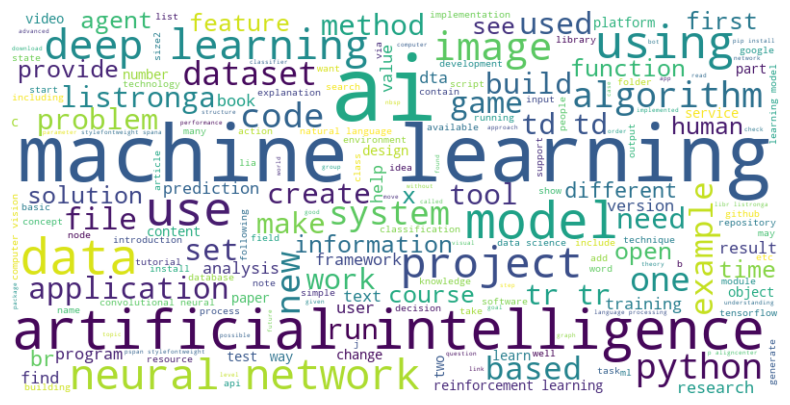

In [12]:
generate_word_cloud(df, 'readme')

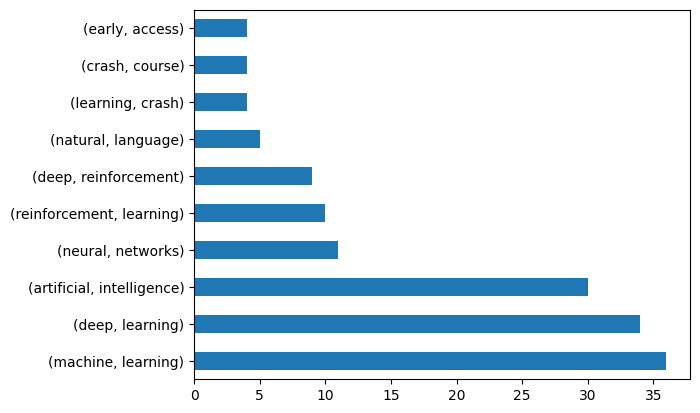

In [40]:
pd.Series((nltk.bigrams(df.readme[0].split()))).value_counts().head(10).plot.barh()
plt.show()